<a href="https://colab.research.google.com/github/aimenbashir/Data-Science-and-AI-assignment/blob/main/DatasciencePractical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Aimen Bashir
2225165082
Bs Se Group B
Data Science Practical

SECTION A — DATA MANIPULATION

Q1. Load & Clean Dataset

In [2]:
import pandas as pd
# a) Load the dataset using pandas
d = pd.read_csv("/content/sales_data.csv")
# b) Convert Date column to datetime
d["Date"] = pd.to_datetime(d["Date"])
# c) Remove missing values
d = d.dropna()
# d) Create TotalSales column
d["TotalSales"] = d["UnitPrice"] * d["Quantity"]

Q2. Exploratory Data Analysis

Total Sales by Region:
Region
East     1060
North    1170
South    1830
West      650
Name: TotalSales, dtype: int64


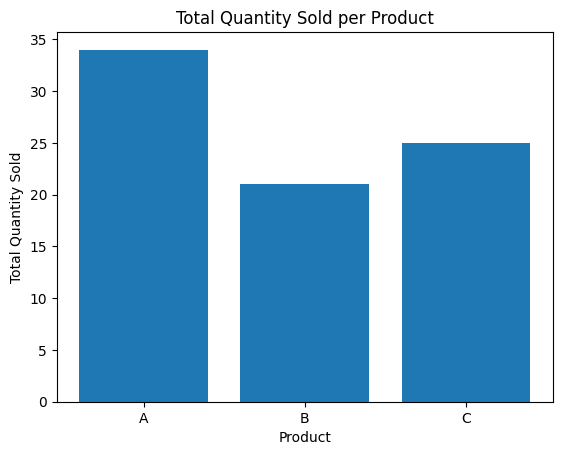

Summary Statistics:
       UnitPrice   Quantity
count   10.00000  10.000000
mean    59.00000   8.000000
std      8.75595   2.309401
min     50.00000   5.000000
25%     50.00000   6.250000
50%     60.00000   8.000000
75%     67.50000   9.750000
max     70.00000  12.000000


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Read cleaned data
data = pd.read_csv("sales_data.csv")
# Create TotalSales column
data["TotalSales"] = data["UnitPrice"] * data["Quantity"]

# a) Total sales by Region
tsr = data.groupby("Region")["TotalSales"].sum()
print("Total Sales by Region:")
print(tsr)
# b) Bar chart
tqp = data.groupby("Product")["Quantity"].sum()
plt.bar(tqp.index, tqp.values)
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.title("Total Quantity Sold per Product")
plt.show()
# c) Summary statistics for UnitPrice and Quantity
print("Summary Statistics:")
print(data[["UnitPrice", "Quantity"]].describe())

SECTION B — MACHINE LEARNING

Q3. Simple Linear Regression

MAE: 64.62184873949582
R2: 0.6851701299266602


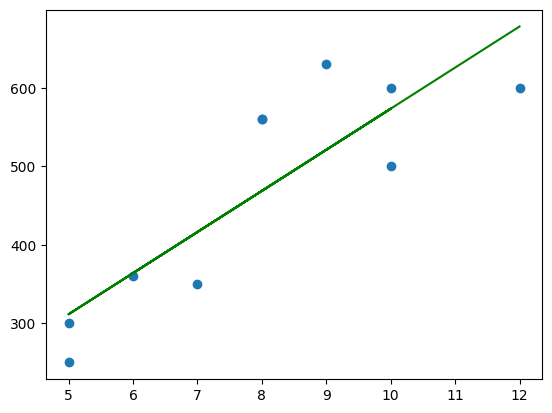

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load and clean data
d = pd.read_csv("sales_data.csv")
d = d.dropna()
d["TotalSales"] = d["UnitPrice"] * d["Quantity"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(d[["Quantity"]], d["TotalSales"], test_size=0.3)
# Train model
m = LinearRegression()
m.fit(X_train, y_train)
# Predict
y_pred = m.predict(X_test)
# Metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))
# Plot
plt.scatter(d["Quantity"], d["TotalSales"])
plt.plot(d["Quantity"], m.predict(d[["Quantity"]]), color="green")
plt.show()

Q4. Classification Task

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



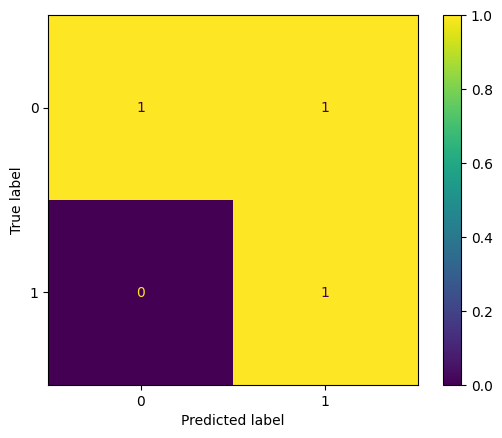

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load and clean data
d = pd.read_csv("sales_data.csv")
d = d.dropna()
d["TotalSales"] = d["UnitPrice"] * d["Quantity"]

# Create binary column
d["HighSale"] = d["TotalSales"].apply(lambda x: 1 if x >= 500 else 0)

# Features and target
X = d[["Quantity"]]
y = d["HighSale"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
